# Zadanie 1

In [1]:
import numpy as np

### 1. Proste sumowane


In [2]:
N = pow(10, 7)
v = 0.53125
tab = np.array([v for _ in range(N)], dtype='float32')

In [3]:
def iter_sum(arr):
    actual_sum = np.float32(0)
    for x in tab:
        actual_sum += x
    
    return actual_sum

In [4]:
actual_sum = iter_sum(tab)
expected_sum = N*v
numpy_sum = np.sum(tab)

In [5]:
print("Wynik prostego sumowania:              {}".format(actual_sum))
print("Rzeczywista suma:                      {}".format(expected_sum))
print("Wynik sumowania funkcji bibliotecznej: {}".format(numpy_sum))

Wynik prostego sumowania:              5030840.5
Rzeczywista suma:                      5312500.0
Wynik sumowania funkcji bibliotecznej: 5312500.0


### 2. Błąd względny i bezwględny

In [6]:
absolute_err = abs(actual_sum - expected_sum)

In [7]:
relative_err = absolute_err / actual_sum

In [8]:
print("Błąd bezwzględny: {}".format(absolute_err))
print("Błąd względny:    {:.2f}%".format(100*relative_err))

Błąd bezwzględny: 281659.5
Błąd względny:    5.60%


### 3. Wzrost błędu w trakcie sumowania


In [9]:
import matplotlib.pyplot as plt

In [10]:
sum3 = np.float32(0)
err_arr = []
x_ax = []
for i, x in enumerate(tab):
    sum3 += x
    if (i+1)%25000 == 0:
        actual = i*tab[0]
        err_arr.append(abs(sum3 - actual) / actual)
        x_ax.append(i)

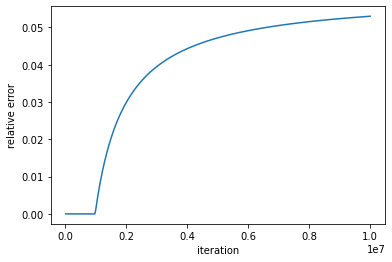

In [11]:
plt.plot(x_ax, err_arr)
plt.xlabel('iteration')
plt.ylabel('relative error')
plt.show()

- Jak można zauważyć na wykresie, błąd względny w początkowej fazie sumowania (ok. pierwsze $10^6$ iteracji) wynosi 0. Dzieje się tak ponieważ różnica rzędów wielkości zmiennej akumulującej oraz liczby dodawanej nie jest wystarczająco duża, lecz w miarę wzrostu akumulatora różnica ta powoduje odcięcie namniej znaczących bitów liczby dodawanej, przez co wynik sumowania nie jest już dokładny.

### 4. Reurencyjny algorytm sumowania


In [12]:
def rec_sum(arr):
    if len(arr) == 1:
        return arr[0]
    
    elif len(arr) == 2:
        return arr[0] + arr[1]
    
    else:
        return rec_sum(arr[: len(arr) // 2]) + rec_sum(arr[len(arr) // 2: ])
        

In [13]:
sum4 = rec_sum(tab)

### 5. Błąd względny i bezwzględny

In [14]:
abs_err4 = abs(sum4 - expected_sum)
rel_err4 = abs_err4 / expected_sum

In [15]:
print("Błąd bezwzględny: {}".format(abs_err4))
print("Błąd względny:    {}%".format(100*rel_err4))

Błąd bezwzględny: 0.0
Błąd względny:    0.0%


- Błąd względny zmalał do 0. Stało się tak dlatego że w algorytmie sumowania rekurencyjnego dodajemy do siebie liczby o podobnych rzędach wielkości, co częsciowo rozwiązuje problem który występował w przypadku sumowania z akumulatorem, kosztem czasu wykonania. Należy także dodać że algorytm sumowania rekurencyjnego działa dobrze w naszym przypadku ponieważ wszystkie liczby w tablicy są jednakowego rzędu. Gdyby jednak zdarzyło się że na wejściu otrzymamy posortowaną tablicę liczb różniących się rzędem wielkości, błąd ponownie się pojawi jako że dodawane nadal będą liczby o znaczących różnicach w wielkości.

### 6. Czas działania

In [16]:
import time

In [17]:
start_iter = time.time()
_ = iter_sum(tab)
end_iter = time.time()

iter_time = end_iter - start_iter

In [18]:
start_rec = time.time()
_ = rec_sum(tab)
end_rec = time.time()

rec_time = end_rec - start_rec

In [19]:
print("Czas sumowania iteracyjnego:   {:.4f} s".format(iter_time))
print("Czas sumowania rekurencyjnego: {:.4f} s".format(rec_time))

Czas sumowania iteracyjnego:   1.8499 s
Czas sumowania rekurencyjnego: 7.8998 s


### 7. Przykładowe dane wejściowe dla których sumowanie rekurencyjne zwraca niezerowy błąd

In [20]:
err = 0

In [22]:
n = 100
start = 0.0001
end = 10
arr = np.linspace(start, end, n, dtype=np.float32)
sum7 = rec_sum(arr)
actual7 = np.sum(arr)

In [23]:
print(
"tablica:                     {}\n\
Długość:                      {}\n\
Rzeczywista suma:             {}\n\
Suma wyliczona rekurencyjnie: {:.5f}\n\
Błąd bezwzględny:             {}".format(arr, 2*n, actual7, sum7, abs(sum7 - actual7)))

tablica:                     [9.9999997e-05 1.0110909e-01 2.0211819e-01 3.0312726e-01 4.0413636e-01
 5.0514543e-01 6.0615456e-01 7.0716363e-01 8.0817270e-01 9.0918183e-01
 1.0101910e+00 1.1112000e+00 1.2122091e+00 1.3132182e+00 1.4142272e+00
 1.5152364e+00 1.6162455e+00 1.7172545e+00 1.8182636e+00 1.9192728e+00
 2.0202818e+00 2.1212909e+00 2.2223001e+00 2.3233092e+00 2.4243181e+00
 2.5253272e+00 2.6263363e+00 2.7273455e+00 2.8283546e+00 2.9293637e+00
 3.0303726e+00 3.1313818e+00 3.2323909e+00 3.3334000e+00 3.4344091e+00
 3.5354183e+00 3.6364272e+00 3.7374363e+00 3.8384454e+00 3.9394546e+00
 4.0404634e+00 4.1414728e+00 4.2424817e+00 4.3434911e+00 4.4445000e+00
 4.5455089e+00 4.6465182e+00 4.7475271e+00 4.8485365e+00 4.9495454e+00
 5.0505548e+00 5.1515636e+00 5.2525725e+00 5.3535819e+00 5.4545908e+00
 5.5556002e+00 5.6566091e+00 5.7576180e+00 5.8586273e+00 5.9596362e+00
 6.0606456e+00 6.1616545e+00 6.2626638e+00 6.3636727e+00 6.4646816e+00
 6.5656910e+00 6.6666999e+00 6.7677093e+00 6.868

# Zadanie 2. Algorytm Kahana


In [24]:
def kahan(arr):
    err = np.float32(0)
    suma = np.float32(0)

    for number in arr:
        y = number - err          # dodanie utraconej częsci z poprzedniej iteracji
        temp = suma + y           # obliczenie nowej sumy (następuje utrata cyfr znaczących)
        err =  (temp - suma) - y  # wyliczenie utraconej częsci z poprzedniego kroku (ze znakiem -)
        suma = temp               
    
    return suma

### 1. Błąd względny i bezwględny

In [25]:
sum5 = kahan(tab)

In [26]:
abs_err5 = abs(sum5 - expected_sum)
rel_err5 = abs_err5 / expected_sum

In [27]:
print("Błąd bezwzględny: {}".format(abs_err5))
print("Błąd względny:    {}%".format(rel_err5))

Błąd bezwzględny: 0.0
Błąd względny:    0.0%


### 2. Dlaczego Algorytm Kahana ma lepsze własności numeryczne?

Podczas dodawania małej liczby do dużej liczby (akumuatora) zdarza się że część najmniej znaczących bitów małej liczby zostanie odcięta (utrata cyfr znaczących). **Algorytm Kahana** redukuje błąd sumowania poprzez wyliczenie utraconej części małej liczby (zmienna **err**), oraz dodanie tej części do kolejnej liczby którą będziemy akumulować w naszym sumowaniu, co sprawia że jest on dokładniejszy niż proste sumowanie w którym utrata cyfr znaczących nie jest kompensowana.

### 3. Czas działania

In [28]:
start_kahan = time.time()
_ = kahan(tab)
end_kahan = time.time()

kahan_time = end_kahan - start_kahan

In [29]:
print("Czas sumowania algorytmem Kahana: {:.4f} s".format(kahan_time))
print("Czas sumowania rekurencyjnego:   {:.4f} s".format(rec_time))

Czas sumowania algorytmem Kahana: 5.6124 s
Czas sumowania rekurencyjnego:   7.8998 s


# Zadanie 3. Sumy częściowe

In [30]:
def dzeta(s, n, backward = False, fl = np.float32):
    start = 1 + backward*(n - 1)
    end = (not backward)*(n + 1) 
    step = backward*(-2) + 1
    # backward=True -> range(n, 0, -1);  backward=False -> range(1, n+1, 1)
    elements = [fl(1 / k**s) for k in range(start, end, step)]
    actual_sum = fl(0)
    for x in elements:
        actual_sum += x
    
    return actual_sum

In [31]:
def eta(s, n, backward = False, fl = np.float32):
    start = 1 + backward*(n - 1)
    end = (not backward)*(n + 1) 
    step = backward*(-2) + 1
    # backward=True -> range(n, 0, -1);  backward=False -> range(1, n+1, 1)
    elements = [fl((-1)**(k - 1) / k**s) for k in range(start, end, step)] 
    actual_sum = fl(0)
    for x in elements:
        actual_sum += x
    
    return actual_sum

In [32]:
s_arr = np.array([2, 3.36667, 5, 7.2, 10], dtype='float32')
n_arr = np.array([50, 100, 200, 500, 1000], dtype='int')
cartesian = [(s, n) for s in s_arr for n in n_arr]

In [33]:
dzeta_elements = lambda s, n: [np.float64(1 / k**s) for k in range(1, n+1)]
eta_elements = lambda s, n: [np.float64((-1)**(k - 1) / k**s) for k in range(1, n+1)]

In [34]:
print("\t\t\t Funkcja dzeta Riemana \t\t\t\t\t Funkcja eta Dirichleta\n")
print("\t\tsumowanie w przód \t sumowanie w tył \t\tsumowanie w przód \t sumowanie wstecz\n")
for s, n in cartesian:
    print("s={:.5f}, n={}\n".format(s, n))
    print("float32: \t{:8.7f} \t\t {:8.7f} \t\t\t {:.8f} \t\t {:.8f}".format(
        dzeta(s,n), dzeta(s, n, backward=True), 
        eta(s,n), eta(s, n, backward=True)
    ))
    print("float64:   \t{:.15f} \t {:.15f} \t\t {:.15f} \t {:.15f}".format(
        dzeta(s,n, fl=np.float64), dzeta(s, n, backward=True, fl=np.float64), 
        eta(s,n, fl=np.float64), eta(s, n, backward=True, fl=np.float64)
    ))
    print("numpy.sum() float64: \t {:.15f} \t\t\t\t\t {:.15f}\n\n".format(
        np.sum(dzeta_elements(s, n), dtype=np.float64),
        np.sum(eta_elements(s, n), dtype=np.float64)
    ))

			 Funkcja dzeta Riemana 					 Funkcja eta Dirichleta

		sumowanie w przód 	 sumowanie w tył 		sumowanie w przód 	 sumowanie wstecz

s=2.00000, n=50

float32: 	1.6251329 		 1.6251327 			 0.82227099 		 0.82227105
float64:   	1.625132733621529 	 1.625132733621529 		 0.822271031826029 	 0.822271031826029
numpy.sum() float64: 	 1.625132733621530 					 0.822271031826029


s=2.00000, n=100

float32: 	1.6349840 		 1.6349839 			 0.82241750 		 0.82241750
float64:   	1.634983900184892 	 1.634983900184893 		 0.822417533374129 	 0.822417533374128
numpy.sum() float64: 	 1.634983900184893 					 0.822417533374128


s=2.00000, n=200

float32: 	1.6399467 		 1.6399465 			 0.82245469 		 0.82245457
float64:   	1.639946546014997 	 1.639946546014997 		 0.822454595922551 	 0.822454595922551
numpy.sum() float64: 	 1.639946546014998 					 0.822454595922551


s=2.00000, n=500

float32: 	1.6429360 		 1.6429360 			 0.82246536 		 0.82246506
float64:   	1.642936065514894 	 1.642936065514894 		 0.822465037424096 	 

- Porównując powyższe wyniki zauważyć można że w niektórych przypadkach wynik sumowania różnił się zależnie od tego czy sumowanie odbywało się w przód czy wstecz. Zakładając że wyniki zwracane przez funkcję biblioteczną numpy.sum() są precyzyjne, zauważyć można że to sumowanie wstecz daje wynik dokładniejszy.
- Szacując względne błędy dla różnej kolejności sumowania 3 liczb, dowieść można że dodawanie liczb zmiennopozycyjnych nie jest działaniem łącznym, co sprawia że kolejność ich dodawania ma znaczenie. Co więcej analizując te błędy, zauważyć można że sumując ciąg liczb na moduł malejących w kolejności rosnącej, uzyskamy dokładniejszy wynik aniżeli sumowanie odbyłoby się zaczynając od liczb na moduł większych, co dodatkowo potwierdzają powyższe wyniki.